<a href="https://colab.research.google.com/github/awol380/Machine-Learning-2410-Assignment-Group1/blob/main/Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Annual Fuel Consumption of Motor Vehicle
## Phase 1: Data Pre-processing, Exploration and Visualisation <br>
### Group Name: ProjectGroup 1
### Adam Wall s3923668
### Kushgar Singh s4027002
### Ayush Tripathi s3941245

## Table of Contents

- [Introduction](#intro)
  - [Dataset Source](#source)
  - [Dataset Details](#details)
  - [Dataset Features](#features)
  - [Target Feature](#target)
- [Goals & Objectives](#go)
- [Data Cleaning & Preprocessing](#cleaning)
- [Data Exploration & Visualisation](#viz)
- [Summary & Conclusions](#sum)
- [References](#ref)

## Introduction <a id='intro'></a>
### Dataset Source:<a id='source'></a>

The source of the dataset on Vehicle Fuel Economy was Kaggle (Maharaj, 2024).  The vehicles included in the dataset include models from 1984 to 2017.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
# see all the columns
pd.set_option('display.max_columns', None)



In [ ]:
url = 'https://raw.githubusercontent.com/awol380/Machine-Learning-2410-Assignment-Group1/main/fuel.csv'
data = pd.read_csv(url)

### Dataset Details: <a id='details'></a>
The original dataset has 81 features such as transmission, cyclinders, fuel type, fuel consumption and cO2 emissions. There are 38,113 records. The dataset lists one car per record which are independent of each other.

A random sample of 10 observations from the selected dataset has been printed.

In [ ]:
data.shape

(38113, 81)

In [ ]:
data.sample(n = 10)

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,engine_cylinders,engine_displacement,turbocharger,supercharger,fuel_type,fuel_type_1,fuel_type_2,city_mpg_ft1,unrounded_city_mpg_ft1,city_mpg_ft2,unrounded_city_mpg_ft2,city_gasoline_consumption_cd,city_electricity_consumption,city_utility_factor,highway_mpg_ft1,unrounded_highway_mpg_ft1,highway_mpg_ft2,unrounded_highway_mpg_ft2,highway_gasoline_consumption_cd,highway_electricity_consumption,highway_utility_factor,unadjusted_city_mpg_ft1,unadjusted_highway_mpg_ft1,unadjusted_city_mpg_ft2,unadjusted_highway_mpg_ft2,combined_mpg_ft1,unrounded_combined_mpg_ft1,combined_mpg_ft2,unrounded_combined_mpg_ft2,combined_electricity_consumption,combined_gasoline_consumption_cd,combined_utility_factor,annual_fuel_cost_ft1,annual_fuel_cost_ft2,gas_guzzler_tax,save_or_spend_5_year,annual_consumption_in_barrels_ft1,annual_consumption_in_barrels_ft2,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,tailpipe_co2_ft2,tailpipe_co2_in_grams_mile_ft2,fuel_economy_score,ghg_score,ghg_score_alt_fuel,my_mpg_data,x2d_passenger_volume,x2d_luggage_volume,x4d_passenger_volume,x4d_luggage_volume,hatchback_passenger_volume,hatchback_luggage_volume,start_stop_technology,alternative_fuel_technology,electric_motor,manufacturer_code,gasoline_electricity_blended_cd,vehicle_charger,alternate_charger,hours_to_charge_120v,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
19819,17772,2002,Buick,Park Avenue,Large Cars,Front-Wheel Drive,Automatic 4-Speed,CLKUP,0,SUPERCHR,6.0,3.8,NaN,NaN,Premium,Premium Gasoline,NaN,16,0.0000,0,0.0,0.0,0.0,0.0,25,0.0000,0,0.0,0.0,0.0,0.0,19.7000,35.1000,0.0,0.0,19,0.0000,0,0.0,0.0,0.0,0.0,2250,0,NaN,-4500,17.347895,0.0,-1,467.736842,-1,0.0,-1,-1,-1,N,0,0,111,19,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
24682,21821,2006,Mazda,3,Compact Cars,Front-Wheel Drive,Automatic (S4),NaN,0,NaN,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,23,0.0000,0,0.0,0.0,0.0,0.0,31,0.0000,0,0.0,0.0,0.0,0.0,28.7269,43.0537,0.0,0.0,26,0.0000,0,0.0,0.0,0.0,0.0,1350,0,NaN,0,12.677308,0.0,-1,341.807692,-1,0.0,-1,-1,-1,Y,0,0,94,11,95,17,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
5196,3877,1987,Dodge,B150/B250 Van 2WD,Vans,Rear-Wheel Drive,Manual 4-Speed,NaN,2871,(FFS),8.0,5.2,NaN,NaN,Regular,Regular Gasoline,NaN,11,0.0000,0,0.0,0.0,0.0,0.0,16,0.0000,0,0.0,0.0,0.0,0.0,14.0000,21.7949,0.0,0.0,13,0.0000,0,0.0,0.0,0.0,0.0,2700,0,NaN,-6750,25.354615,0.0,-1,683.615385,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
36477,36781,2016,Mercedes-Benz,AMG GLE63,Standard Sport Utility Vehicle 4WD,4-Wheel Drive,Automatic 7-Speed,NaN,406,SIDI,8.0,5.5,True,NaN,Premium,Premium Gasoline,NaN,13,13.0729,0,0.0,0.0,0.0,0.0,17,16.8556,0,0.0,0.0,0.0,0.0,17.1000,24.4000,0.0,0.0,15,14.5414,0,0.0,0.0,0.0,0.0,2800,0,NaN,-7250,21.974000,0.0,611,611.000000,-1,0.0,2,2,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
20120,18000,2002,GMC,Safari 2WD (cargo),"Vans, Cargo Type",Rear-Wheel Drive,Automatic 4-Speed,CLKUP,0,NaN,6.0,4.3,NaN,NaN,Regular,Regular Gasoline,NaN,15,0.0000,0,0.0,0.0,0.0,0.0,20,0.0000,0,0.0,0.0,0.0,0.0,18.9000,28.4000,0.0,0.0,17,0.0000,0,0.0,0.0,0.0,0.0,2050,0,NaN,-3500,19.388824,0.0,-1,522.764706,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
7490,5248,1989,Chrysler,TC By,Two Seaters,Front-Wheel Drive,Manual 5-Speed,NaN,2004,"(FFS,TRBO)",4.0,2.2,True,NaN,Premium,Premium Gasoline,NaN,16,0.0000,0,0.0,0.0,0.0,0.0,23,0.0000,0,0.0,0.0,0.0,0.0,20.0000,32.0000,0.0,0.0,19,0.0000,0,0.0,0.0,0.0,0.0,2250,0,NaN,-4500,17.347895,0.0,-1,467.736842,-1,0.0,-1,-1,-1,Y,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
30074,30547,2011,Ford,

### Dataset Features: <a id='features'></a>

#### The features of the dataset are described in the table below.

In [ ]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['vehicle_id','Integer','NA','Unique number given to each row from which we can access our data'],
         ['year','Integer','Date','When car was manufactured'],
         ['make','Object','NA','Manufacturer or brand the car'],
         ['model','Object','NA','The specific model name or number of the vehicle'],
         ['drive','Object','NA','Drive type of the vehicle.\n 4WD - Four Wheel drive\n 2WD - Two wheel drive\n FWD -  Front wheel drive\n RWD - Rear wheel drive \n AWD - All Wheel drive'],
         ['transmission','Object','NA','Type of transmission installed in the car.'],
         ['engine_cylinders','float','NA','Number of cylinders in the engine of the car'],
         ['engine_displacement','float','NA','Volume of engines combustion chambers, it is typically measured in litres(L) \nor cc(cubic centimeters)'],
         ['fuel_type','Object','NA','Type of fuel used by car'],
         ['fuel_type_1','Object','NA','Type of fuel used by car'],
         ['city_mpg_ft1','Integer','NA','City Fuel consumption of the car'],
         ['highway_mpg_ft1','Integer','NA','Highway Fuel consumption of the car'],
         ['highway_electricity_consumption','float','NA','Electricity consumed by car when driven on highway'],
         ['combined_mpg_ft1','Integer','NA','Combined Fuel consumption of the car'],
         ['combined_electricity_consumption','float','NA','Electricity consumed by car when driven on both highway and city'],
         ['annual_fuel_cost_ft1','Integer','NA','Yearly fuel cost of the car'],
         ['annual_consumption_in_barrels_ft1','float','NA','Number of fuel barrels consumed by car in a year'],
         ['tailpipe_co2_in_grams_mile_ft1','float','NA','Emission of Carbon Dioxide in grams'],
        ['start_stop_technology','float','NA','Indicates whether vehicle is equipped with start stop technology. It automatically \nshuts off engine when car stops to save fuel.']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════════════════╤═════════════╤═════════╤═════════════════════════════════════════════════════════════════════════════════════╕
│ Name                              │ Data Type   │ Units   │ Description                                                                         │
╞═══════════════════════════════════╪═════════════╪═════════╪═════════════════════════════════════════════════════════════════════════════════════╡
│ vehicle_id                        │ Integer     │ NA      │ Unique number given to each row from which we can access our data                   │
├───────────────────────────────────┼─────────────┼─────────┼─────────────────────────────────────────────────────────────────────────────────────┤
│ year                              │ Integer     │ Date    │ When car was manufactured                                                           │
├───────────────────────────────────┼─────────────┼─────────┼───────────────────────────────────────────────────

### Target feature <a id='target'></a>
For this project we chose 'annual_consumption_in_barrels_ft1' as our target feature. This tells us the annual fuel consumed by vehicle of specific make and model in barrels. With the help of this target feature we can get  more insight of fuel efficiency of vehicle and their impact on environment. In fuel efficiency comparison, if the vehicle is consuming less fuel then it will have lower annual fuel consumption. This may attract more consumer who wants fuel efficient car.
We can also predict its environmental impact by checking vehicle with higher values in annual fuel consumption in barrels. These vehicles will have greater environmental impact. Overall, 'annual_consumption_in_barrels_ft1' can provide some meaningful insights which can help consumers choose the right vehicle for them.

## Goals & Objectives <a id='go'></a>

## Data Cleaning & Preprocessing <a id='cleaning'></a>


In [ ]:
data.columns.to_list()

['vehicle_id',
 'year',
 'make',
 'model',
 'class',
 'drive',
 'transmission',
 'transmission_type',
 'engine_index',
 'engine_descriptor',
 'engine_cylinders',
 'engine_displacement',
 'turbocharger',
 'supercharger',
 'fuel_type',
 'fuel_type_1',
 'fuel_type_2',
 'city_mpg_ft1',
 'unrounded_city_mpg_ft1',
 'city_mpg_ft2',
 'unrounded_city_mpg_ft2',
 'city_gasoline_consumption_cd',
 'city_electricity_consumption',
 'city_utility_factor',
 'highway_mpg_ft1',
 'unrounded_highway_mpg_ft1',
 'highway_mpg_ft2',
 'unrounded_highway_mpg_ft2',
 'highway_gasoline_consumption_cd',
 'highway_electricity_consumption',
 'highway_utility_factor',
 'unadjusted_city_mpg_ft1',
 'unadjusted_highway_mpg_ft1',
 'unadjusted_city_mpg_ft2',
 'unadjusted_highway_mpg_ft2',
 'combined_mpg_ft1',
 'unrounded_combined_mpg_ft1',
 'combined_mpg_ft2',
 'unrounded_combined_mpg_ft2',
 'combined_electricity_consumption',
 'combined_gasoline_consumption_cd',
 'combined_utility_factor',
 'annual_fuel_cost_ft1',
 'annual

In [ ]:
#dropping columns from the original dataset
data = data.loc[:,['vehicle_id','year','make','model','class','drive','transmission','engine_cylinders','engine_displacement','fuel_type','fuel_type_1','city_mpg_ft1','highway_mpg_ft1','highway_electricity_consumption','combined_mpg_ft1','combined_electricity_consumption','annual_fuel_cost_ft1','annual_consumption_in_barrels_ft1','tailpipe_co2_in_grams_mile_ft1','start_stop_technology']]

In [ ]:
data.shape

(38113, 20)

In [ ]:
data = data.set_index('vehicle_id')

In [ ]:
data.isna().sum() #identify empty variables

year                                     0
make                                     0
model                                    0
class                                    0
drive                                 1189
transmission                            11
engine_cylinders                       136
engine_displacement                    134
fuel_type                                0
fuel_type_1                              0
city_mpg_ft1                             0
highway_mpg_ft1                          0
highway_electricity_consumption          0
combined_mpg_ft1                         0
combined_electricity_consumption         0
annual_fuel_cost_ft1                     0
annual_consumption_in_barrels_ft1        0
tailpipe_co2_in_grams_mile_ft1           0
start_stop_technology                38113
dtype: int64

In [ ]:
data = data.drop(['start_stop_technology'], axis=1)

In [ ]:
data = data.dropna() #low volumes of NA values, less than 10% of dataset. Many are categorical which cannot be imputed by numeric means.

In [ ]:
data.nunique() #identify any constant columns

year                                   34
make                                  127
model                                3662
class                                  34
drive                                   7
transmission                           45
engine_cylinders                        9
engine_displacement                    65
fuel_type                              13
fuel_type_1                             5
city_mpg_ft1                           52
highway_mpg_ft1                        50
highway_electricity_consumption        24
combined_mpg_ft1                       49
combined_electricity_consumption       27
annual_fuel_cost_ft1                   58
annual_consumption_in_barrels_ft1     135
tailpipe_co2_in_grams_mile_ft1        590
dtype: int64

In [ ]:
data.describe(include=object) #summarise categorical features

,make,model,class,drive,transmission,fuel_type,fuel_type_1
count,36794,36794,36794,36794,36794,36794,36794
unique,127,3662,34,7,45,13,5
top,Chevrolet,F150 Pickup 2WD,Compact Cars,Front-Wheel Drive,Automatic 4-Speed,Regular,Regular Gasoline
freq,3710,208,5253,13303,10785,24230,25503


In [ ]:
categorical_features= list(data.columns[data.dtypes == object])

In [ ]:
for feature in categorical_features:
  print(f'{feature}')
  print(data[feature].unique())
  print("\n")
  #engine_cylinders nan

make
['AM General' 'American Motors Corporation' 'Buick' 'Cadillac' 'Chevrolet'
 'Dodge' 'Ford' 'GMC' 'Grumman Olson' 'Import Foreign Auto Sales Inc'
 'Isuzu' 'Jeep' 'Mazda' 'Mitsubishi' 'Nissan' 'Plymouth'
 'S and S Coach Company  E.p. Dutton' 'Subaru'
 'Superior Coaches Div E.p. Dutton' 'Suzuki' 'Toyota' 'Volkswagen'
 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bertone'
 'Bill Dovell Motor Car Company' 'BMW' 'Chrysler' 'E. P. Dutton, Inc.'
 'Ferrari' 'Honda' 'Jaguar' 'Lincoln' 'Lotus' 'Maserati' 'Mercedes-Benz'
 'Mercury' 'Merkur' 'Oldsmobile' 'Peugeot' 'Pininfarina' 'Pontiac'
 'Porsche' 'Renault' 'Rolls-Royce' 'Saab' 'TVR Engineering Ltd' 'Volvo'
 'Acura' 'Autokraft Limited' 'Bitter Gmbh and Co. Kg' 'Hyundai'
 'Lambda Control Systems' 'Lamborghini' 'London Coach Co Inc'
 'Panther Car Company Limited' 'Texas Coach Company' 'Vixen Motor Company'
 'Volga Associated Automobile' 'Yugo' 'ASC Incorporated' 'CCC Engineering'
 'CX Automotive' 'Excalibur Autos' 'Land Rover' 'Mcevoy Motors'
 'Red Shif

In [ ]:
#Data prep for data['class'] feature
data['class'] = data['class'].str.replace('2WD','', case=False)
data['class'] = data['class'].str.replace('4WD','', case=False)
data['class'] = data['class'].str.replace('/','', case=False)
data['class'] = data['class'].str.replace(' -','', case=False)
data['class'] = data['class'].str.strip()
data['class'].unique()

array(['Special Purpose Vehicle', 'Large Cars', 'Standard Pickup Trucks',
       'Vans, Passenger Type', 'Vans, Cargo Type',
       'Special Purpose Vehicles', 'Small Pickup Trucks',
       'Minicompact Cars', 'Two Seaters', 'Subcompact Cars',
       'Midsize Cars', 'Midsize-Large Station Wagons', 'Compact Cars',
       'Small Station Wagons', 'Vans', 'Vans Passenger',
       'Midsize Station Wagons', 'Sport Utility Vehicle', 'Minivan',
       'Small Sport Utility Vehicle', 'Standard Sport Utility Vehicle'],
      dtype=object)

In [ ]:
data['class'] = data['class'].str.replace('Special Purpose Vehicles','Special Purpose Vehicle')
data['class'] = data['class'].str.replace('Vans Passenger','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Minivan','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Standard ','')
data['class'].value_counts()

class
Compact Cars                    5253
Pickup Trucks                   4514
Subcompact Cars                 4484
Sport Utility Vehicle           4307
Midsize Cars                    4165
Special Purpose Vehicle         2371
Two Seaters                     1820
Large Cars                      1810
Small Station Wagons            1382
Minicompact Cars                1230
Small Pickup Trucks             1190
Vans                            1141
Small Sport Utility Vehicle      924
Vans, Passenger Type             700
Midsize-Large Station Wagons     640
Vans, Cargo Type                 438
Midsize Station Wagons           425
Name: count, dtype: int64

In [ ]:
#Data prep for data['transmission'] feature
data['transmission'].value_counts()

transmission
Automatic 4-Speed                   10785
Manual 5-Speed                       7959
Automatic 3-Speed                    2720
Automatic (S6)                       2684
Manual 6-Speed                       2448
Automatic 5-Speed                    2191
Automatic 6-Speed                    1447
Manual 4-Speed                       1368
Automatic (S8)                        977
Automatic (S5)                        827
Automatic (variable gear ratios)      697
Automatic 7-Speed                     675
Automatic (S7)                        270
Auto(AM-S7)                           266
Automatic 8-Speed                     259
Automatic (S4)                        233
Auto(AM7)                             166
Auto(AV-S6)                           153
Auto(AM6)                             120
Automatic 9-Speed                     105
Auto(AM-S6)                            87
Auto(AV-S7)                            80
Manual 3-Speed                         77
Manual 7-Speed       

In [ ]:
data['transmission'] = data['transmission'].str.replace('Automatic','Auto')
data[['transmission', 'gears']] = data['transmission'].str.split(' ', n = 1, expand=True)
data[['transmission', 'gears2']] = data['transmission'].str.split('(', n = 1, expand=True)
data['transmission'].value_counts()

transmission
Auto      24865
Manual    11929
Name: count, dtype: int64

In [ ]:
#Data prep for new feature data['gear']
data['gears'].fillna(data['gears2'])
data = data.drop(['gears2'], axis=1)
data['gears'] = data['gears'].str.extract('(\d+)')

In [ ]:
#Data prep for data['fuel_type'] feature
data['fuel_type'].value_counts()

fuel_type
Regular                        24230
Premium                        10132
Gasoline or E85                 1223
Diesel                           857
Premium or E85                   122
Midgrade                          77
CNG                               60
Premium and Electricity           25
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: count, dtype: int64

In [ ]:
fuel_df = data.loc[:,['fuel_type','fuel_type_1']]
pd.pivot_table(fuel_df, index='fuel_type', columns='fuel_type_1', aggfunc=len, fill_value=0)

fuel_type_1,Diesel,Midgrade Gasoline,Natural Gas,Premium Gasoline,Regular Gasoline
fuel_type,,,,,
CNG,0,0,60,0,0
Diesel,857,0,0,0,0
Gasoline or E85,0,0,0,0,1223
Gasoline or natural gas,0,0,0,0,20
Gasoline or propane,0,0,0,0,8
Midgrade,0,77,0,0,0
Premium,0,0,0,10132,0
Premium Gas or Electricity,0,0,0,18,0
Premium and Electricity,0,0,0,25,0


In [ ]:
data.loc[data['fuel_type'] == 'Premium Gas or Electricity', 'fuel_type_1'] = 'Premium Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas or Electricity', 'fuel_type_1'] = 'Regular Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Premium Gas and Electricity', 'fuel_type_1'] = 'Premium Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas and Electricity', 'fuel_type_1'] = 'Regular Hybrid'
data = data.drop(['fuel_type'], axis=1)

In [ ]:
data.describe(include=np.number).round(2) #summarise numeric features
#year should be categorical? or removed

,year,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,highway_electricity_consumption,combined_mpg_ft1,combined_electricity_consumption,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1
count,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00
mean,2000.67,5.76,3.34,17.64,23.80,0.08,19.90,0.08,1983.13,17.62,475.58
std,10.20,1.75,1.36,4.76,5.79,1.88,5.08,1.86,528.53,4.47,119.12
min,1984.00,2.00,0.60,6.00,9.00,0.00,7.00,0.00,600.00,0.06,29.00
25%,1991.00,4.00,2.20,15.00,20.00,0.00,16.00,0.00,1600.00,14.98,397.00
50%,2001.00,6.00,3.00,17.00,24.00,0.00,19.00,0.00,1950.00,17.35,467.74
75%,2010.00,6.00,4.30,20.00,27.00,0.00,22.00,0.00,2350.00,20.60,555.44
max,2017.00,16.00,8.40,58.00,61.00,71.00,58.00,71.00,6050.00,47.09,1269.57


In [ ]:
#Here we are doing binning for or data and converting some numeric features to represent different levels.
#First we will define the bin edges
displacement_bins = [0,2,3, float('inf')]
engine_displacement_binned = pd.cut(data['engine_displacement'], bins=displacement_bins, labels=['<2','2-3','>3'])#In <2 2 is not included
print(engine_displacement_binned)

vehicle_id
27550    2-3
28426    2-3
27549     >3
28425     >3
27593     >3
        ... 
37564     <2
37547     <2
37548     <2
37703     <2
37687     <2
Name: engine_displacement, Length: 36794, dtype: category
Categories (3, object): ['<2' < '2-3' < '>3']


In [ ]:
#Check for any missing values
data['engine_displacement'].isna().sum()
data['drive'].isna().sum()

0

In [ ]:
#Check for the number of same values in drive column
drive_count = data['drive'].value_counts()
print(drive_count)

drive
Front-Wheel Drive             13303
Rear-Wheel Drive              12982
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2094
4-Wheel Drive                  1100
2-Wheel Drive                   491
Part-time 4-Wheel Drive         176
Name: count, dtype: int64


In [ ]:
data['drive'] = data['drive'].str.replace('Front-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('Rear-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('4-Wheel or All-Wheel Drive','4|All Wheel ')
data['drive'] = data['drive'].str.replace('All-Wheel Drive','All Wheel')
data['drive'] = data['drive'].str.replace('4-Wheel Drive','4')
data['drive'] = data['drive'].str.replace('2-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('Part-time 4','4')
print(data['drive'].value_counts())

drive
2               26776
4|All Wheel      6648
All Wheel        2094
4                1276
Name: count, dtype: int64


In [ ]:
#Getting mean of city mileage and highway mileage
city_mean = data.groupby('make')['city_mpg_ft1'].mean()
data['make_encoded'] = data['make'].map(city_mean)
print(city_mean)

highway_mean = data.groupby('make')['highway_mpg_ft1'].mean()
data['make_encoded'] = data['make'].map(highway_mean)
print(highway_mean)

make
AM General                     15.166667
ASC Incorporated               14.000000
Acura                          18.897351
Alfa Romeo                     17.533333
American Motors Corporation    16.296296
                                 ...    
Volkswagen                     20.814484
Volvo                          17.987535
Wallace Environmental          12.437500
Yugo                           23.000000
smart                          33.090909
Name: city_mpg_ft1, Length: 127, dtype: float64
make
AM General                     15.000000
ASC Incorporated               21.000000
Acura                          25.874172
Alfa Romeo                     24.488889
American Motors Corporation    20.481481
                                 ...    
Volkswagen                     28.354167
Volvo                          25.042936
Wallace Environmental          16.000000
Yugo                           28.250000
smart                          39.090909
Name: highway_mpg_ft1, Length: 127, dtyp

In [ ]:
#Log transformation
data['citympg_log'] = np.log(data['city_mpg_ft1'])
data['highwaympg_log'] = np.log(data['highway_mpg_ft1'])

## Data Exploration & Visualisation <a id='viz'></a>

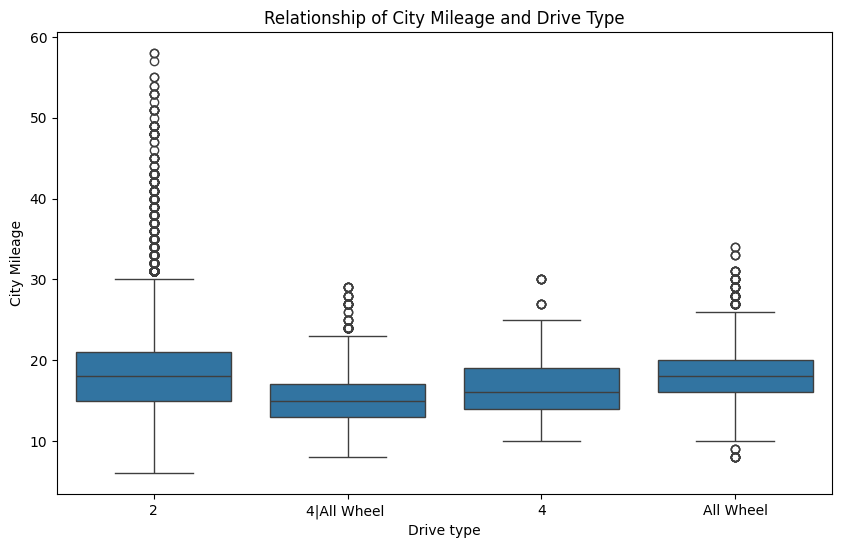

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creating box plot to compare relationship between engine displacement and drive type.
plt.figure(figsize=(10,6))
sns.boxplot(x='drive', y='city_mpg_ft1', data=data)
plt.xlabel('Drive type')
plt.ylabel('City Mileage')
plt.title("Relationship of City Mileage and Drive Type")
plt.show()

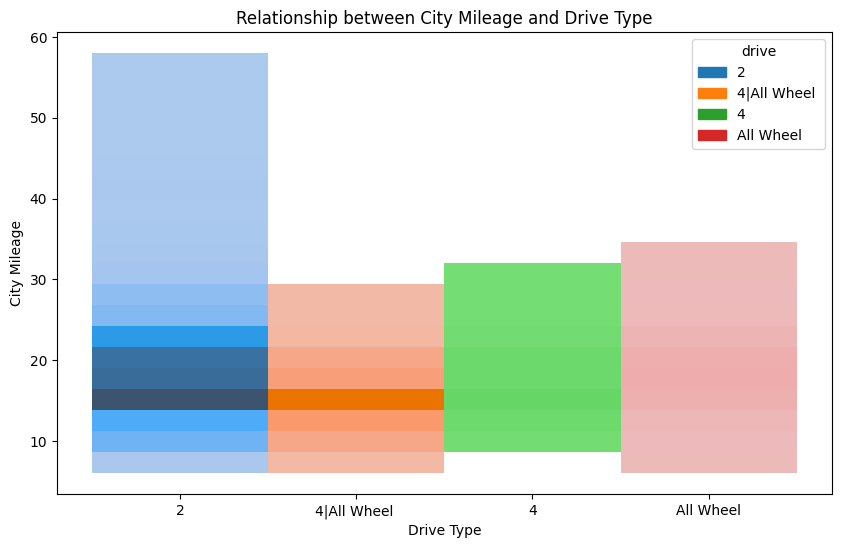

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='drive', y='city_mpg_ft1', hue='drive', bins=20, kde=True, multiple='stack')
plt.xlabel('Drive Type')
plt.ylabel('City Mileage')
plt.title("Relationship between City Mileage and Drive Type")
plt.show()

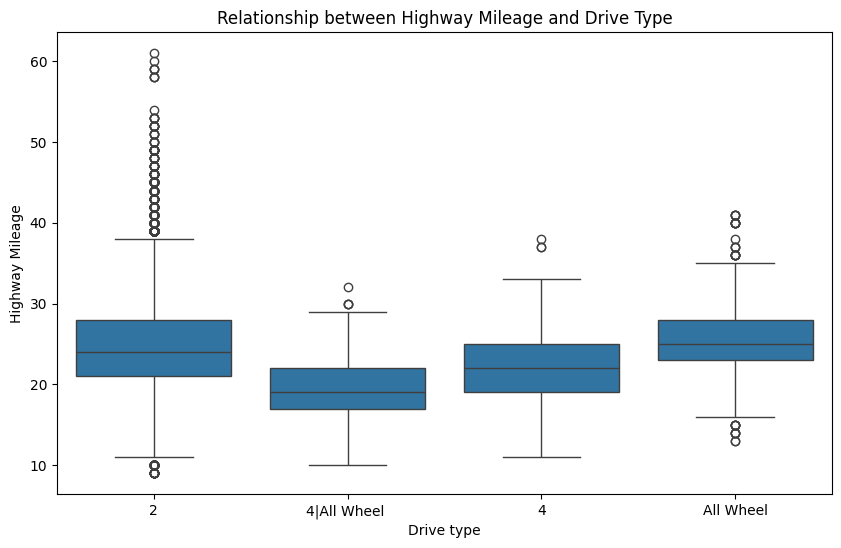

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='drive', y='highway_mpg_ft1', data=data)
plt.xlabel('Drive type')
plt.ylabel('Highway Mileage')
plt.title("Relationship between Highway Mileage and Drive Type")
plt.show()

####

It provides insights into the fuel efficiency performance of vehicles with different drive types, with trade off between fuel efficiency, traction, stability, and their off-road capability. For 2 Wheel drive the histogram spans a wide range of city mileage between 6 and 58 km/l which is the highest among all, it indicates that vehicle with 2 wheel drive can achieve relatively high fuel efficiency in city driving conditions. In 4/All wheel and 4 wheel drive, the histogram shows somewhat narrower range of city mileage i.e. from 6 to 30 km/l which suggests
that these types of vehicle are more focused on giving better traction and stability rather than giving higher fuel efficiency. The histogram of All Wheel drive indicates that these type of vehicles offer a good balance between traction, stability and fuel efficiency in city driving conditions i.e. from 6 to 35 km/l.

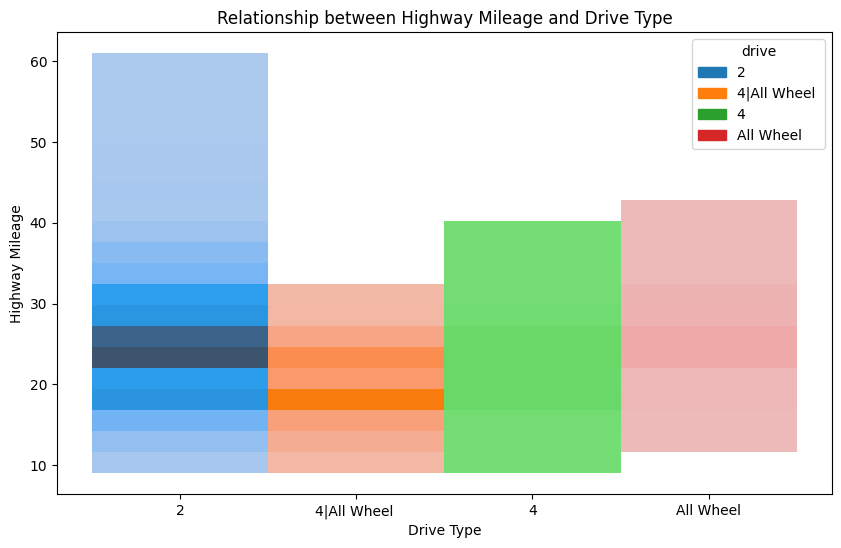

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='drive', y='highway_mpg_ft1', hue='drive', bins=20, kde=True, multiple='stack')
plt.xlabel('Drive Type')
plt.ylabel('Highway Mileage')
plt.title("Relationship between Highway Mileage and Drive Type")
plt.show()

####
It tells us varying fuel efficiency ranges for different drive types in highway conditions. 2-wheel drive again is the most fuel efficient among all drive types as it is benefitted from reduced friction and weight as compared to its counterparts. Vehicle with 4/All Wheel drive is considered more suitable for changing weather conditions and off road driving rather than highway mileage suggest that they have decent highway mileage ranging from 8 to 32 km/l, this is maybe because of the advancements of technology and drivetrain efficiency. People buying vehicle with this type of drive type may have to compromise between highway fuel efficiency and traction/stability benefits. Surprisingly 4 and All Wheel drive type offers much better highway fuel efficiency between 8 to 42 km/l than 4/All Wheel drive type which indicates that vehicles with this drive type can offer better fuel efficiency without compromising traction, stability and performance in adverse weather conditions.

In [ ]:
#data.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

In [ ]:
data = data.drop_duplicates(subset=data.columns.difference(['vehicle_id'])) #drop duplicate rows

<Axes: xlabel='engine_cylinders', ylabel='annual_fuel_cost_ft1'>

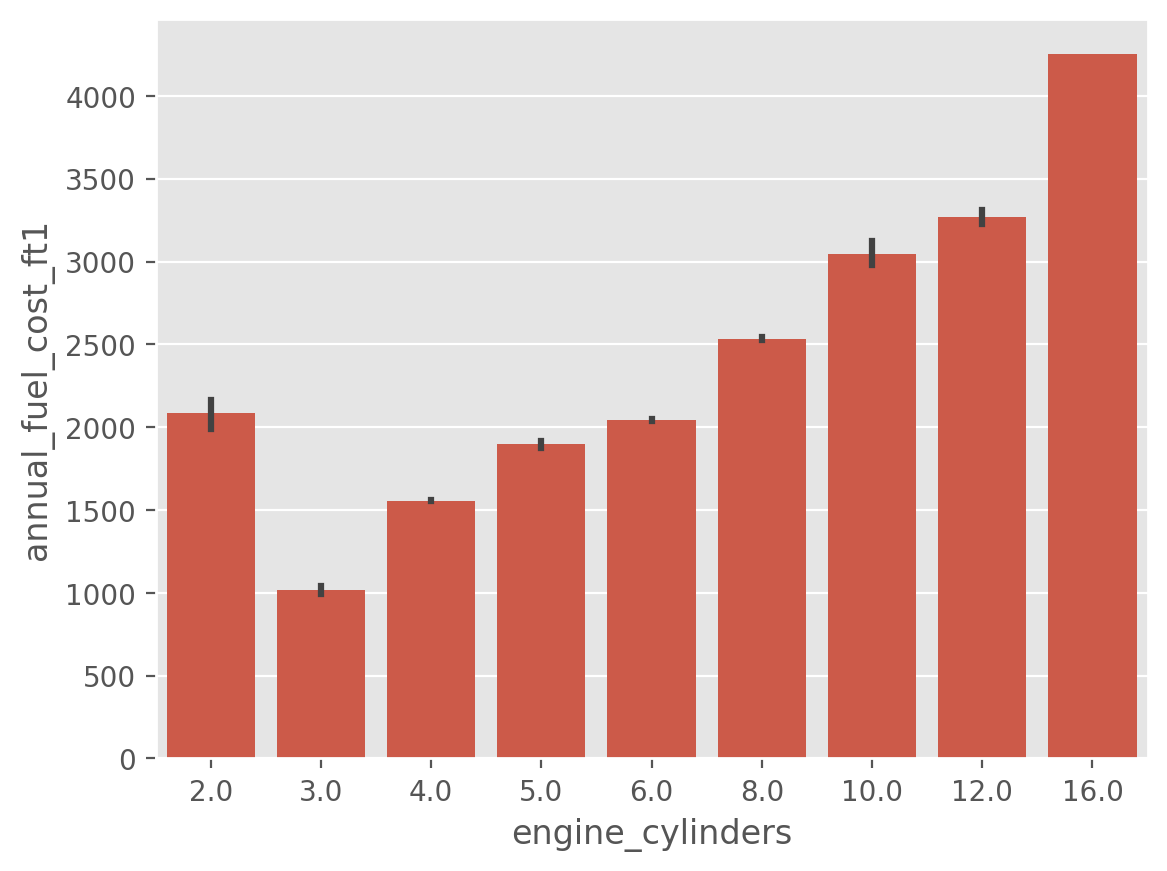

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

import seaborn as sns

sns.barplot(data=data, x="engine_cylinders", y="annual_fuel_cost_ft1")

#sns.histplot(data=data, x="engine_cylinders", y="annual_fuel_cost_ft1")

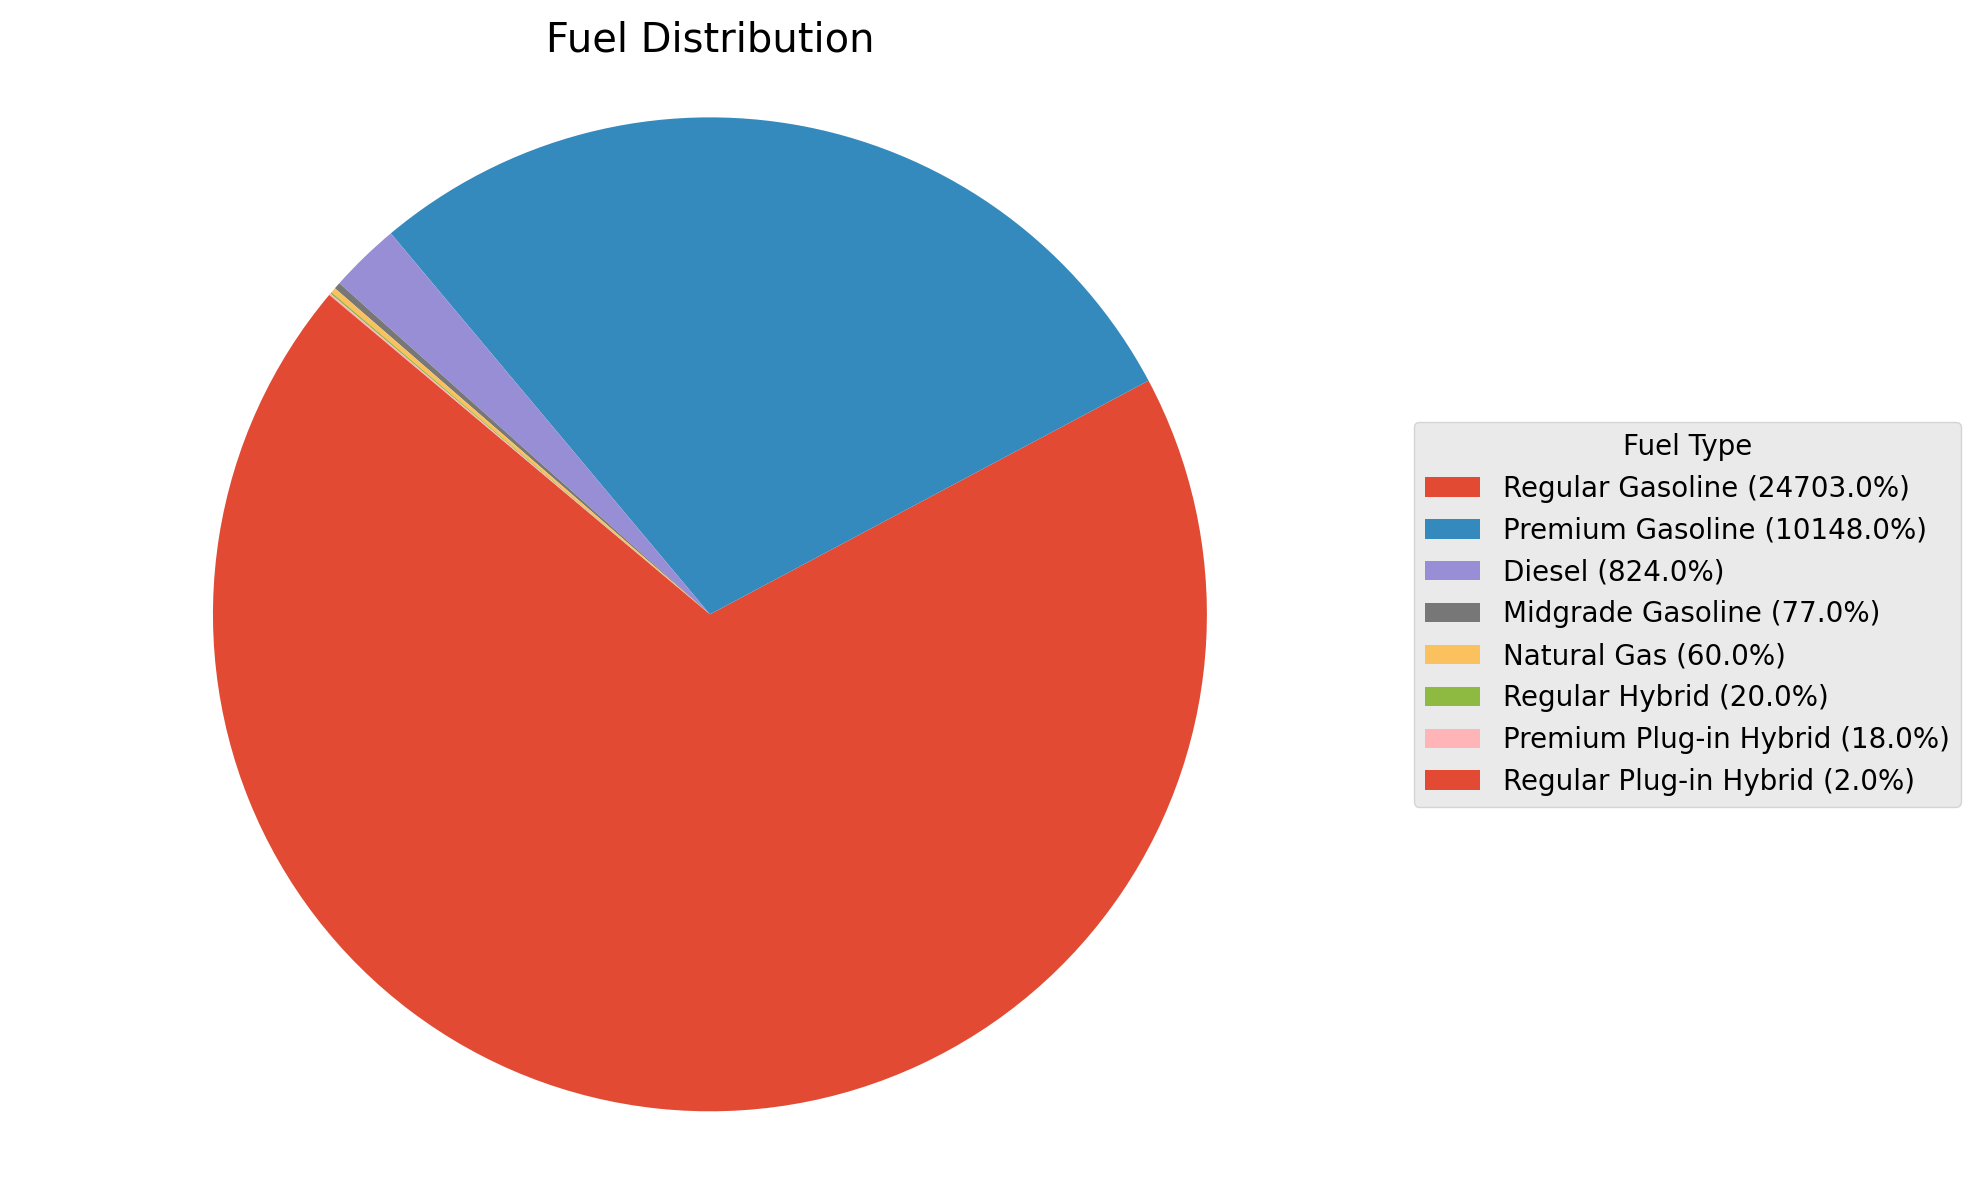

In [ ]:
dataaa = data['fuel_type_1'].value_counts()
labels = dataaa.index
size = dataaa.values

# Create a pie chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot the pie chart
wedges, _ = plt.pie(size, labels=None, startangle=140)

# Combine labels with percentage values for legend
legend_labels = [f'{label} ({size:.1f}%)' for label, size in zip(labels, size)]

# Add labels with percentage values in the legend
plt.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Fuel Type")

plt.title('Fuel Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
data['decade'] = ((data['year']//10).round().astype(int) * 10).astype(str)+'s'
data

,year,make,model,class,drive,transmission,engine_cylinders,engine_displacement,fuel_type_1,city_mpg_ft1,highway_mpg_ft1,highway_electricity_consumption,combined_mpg_ft1,combined_electricity_consumption,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1,gears,make_encoded,citympg_log,highwaympg_log,decade
vehicle_id,,,,,,,,,,,,,,,,,,,,,,
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle,2,Auto,4.0,2.5,Regular Gasoline,18,17,0.0,17,0.0,2050,19.388824,522.764706,3,15.000000,2.890372,2.833213,1980s
27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle,2,Auto,6.0,4.2,Regular Gasoline,13,13,0.0,13,0.0,2700,25.354615,683.615385,3,15.000000,2.564949,2.564949,1980s
27593,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4|All Wheel,Auto,6.0,4.2,Regular Gasoline,15,20,0.0,17,0.0,2050,19.388824,522.764706,3,20.481481,2.708050,2.995732,1980s
28455,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4|All Wheel,Auto,6.0,4.2,Regular Gasoline,15,19,0.0,17,0.0,2050,19.388824,522.764706,3,20.481481,2.708050,2.944439,1980s
27591,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4|All Wheel,Manual,4.0,2.5,Regular Gasoline,19,22,0.0,20,0.0,1750,16.480500,444.350000,4,20.481481,2.944439,3.091042,1980s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle,2,Auto,4.0,2.0,Regular Gasoline,23,30,0.0,26,0.0,1350,12.677308,348.000000,8,25.042936,3.135494,3.401197,2010s
37547,2017,Volvo,XC90 AWD,Sport Utility Vehicle,All Wheel,Auto,4.0,2.0,Premium Gasoline,20,25,0.0,22,0.0,1900,14.982273,399.000000,8,25.042936,2.995732,3.218876,2010s
37548,2017,Volvo,XC90 AWD,Sport Utility Vehicle,All Wheel,Auto,4.0,2.0,Premium Gasoline,22,25,0.0,23,0.0,1850,14.330870,384.000000,8,25.042936,3.091042,3.218876,2010s


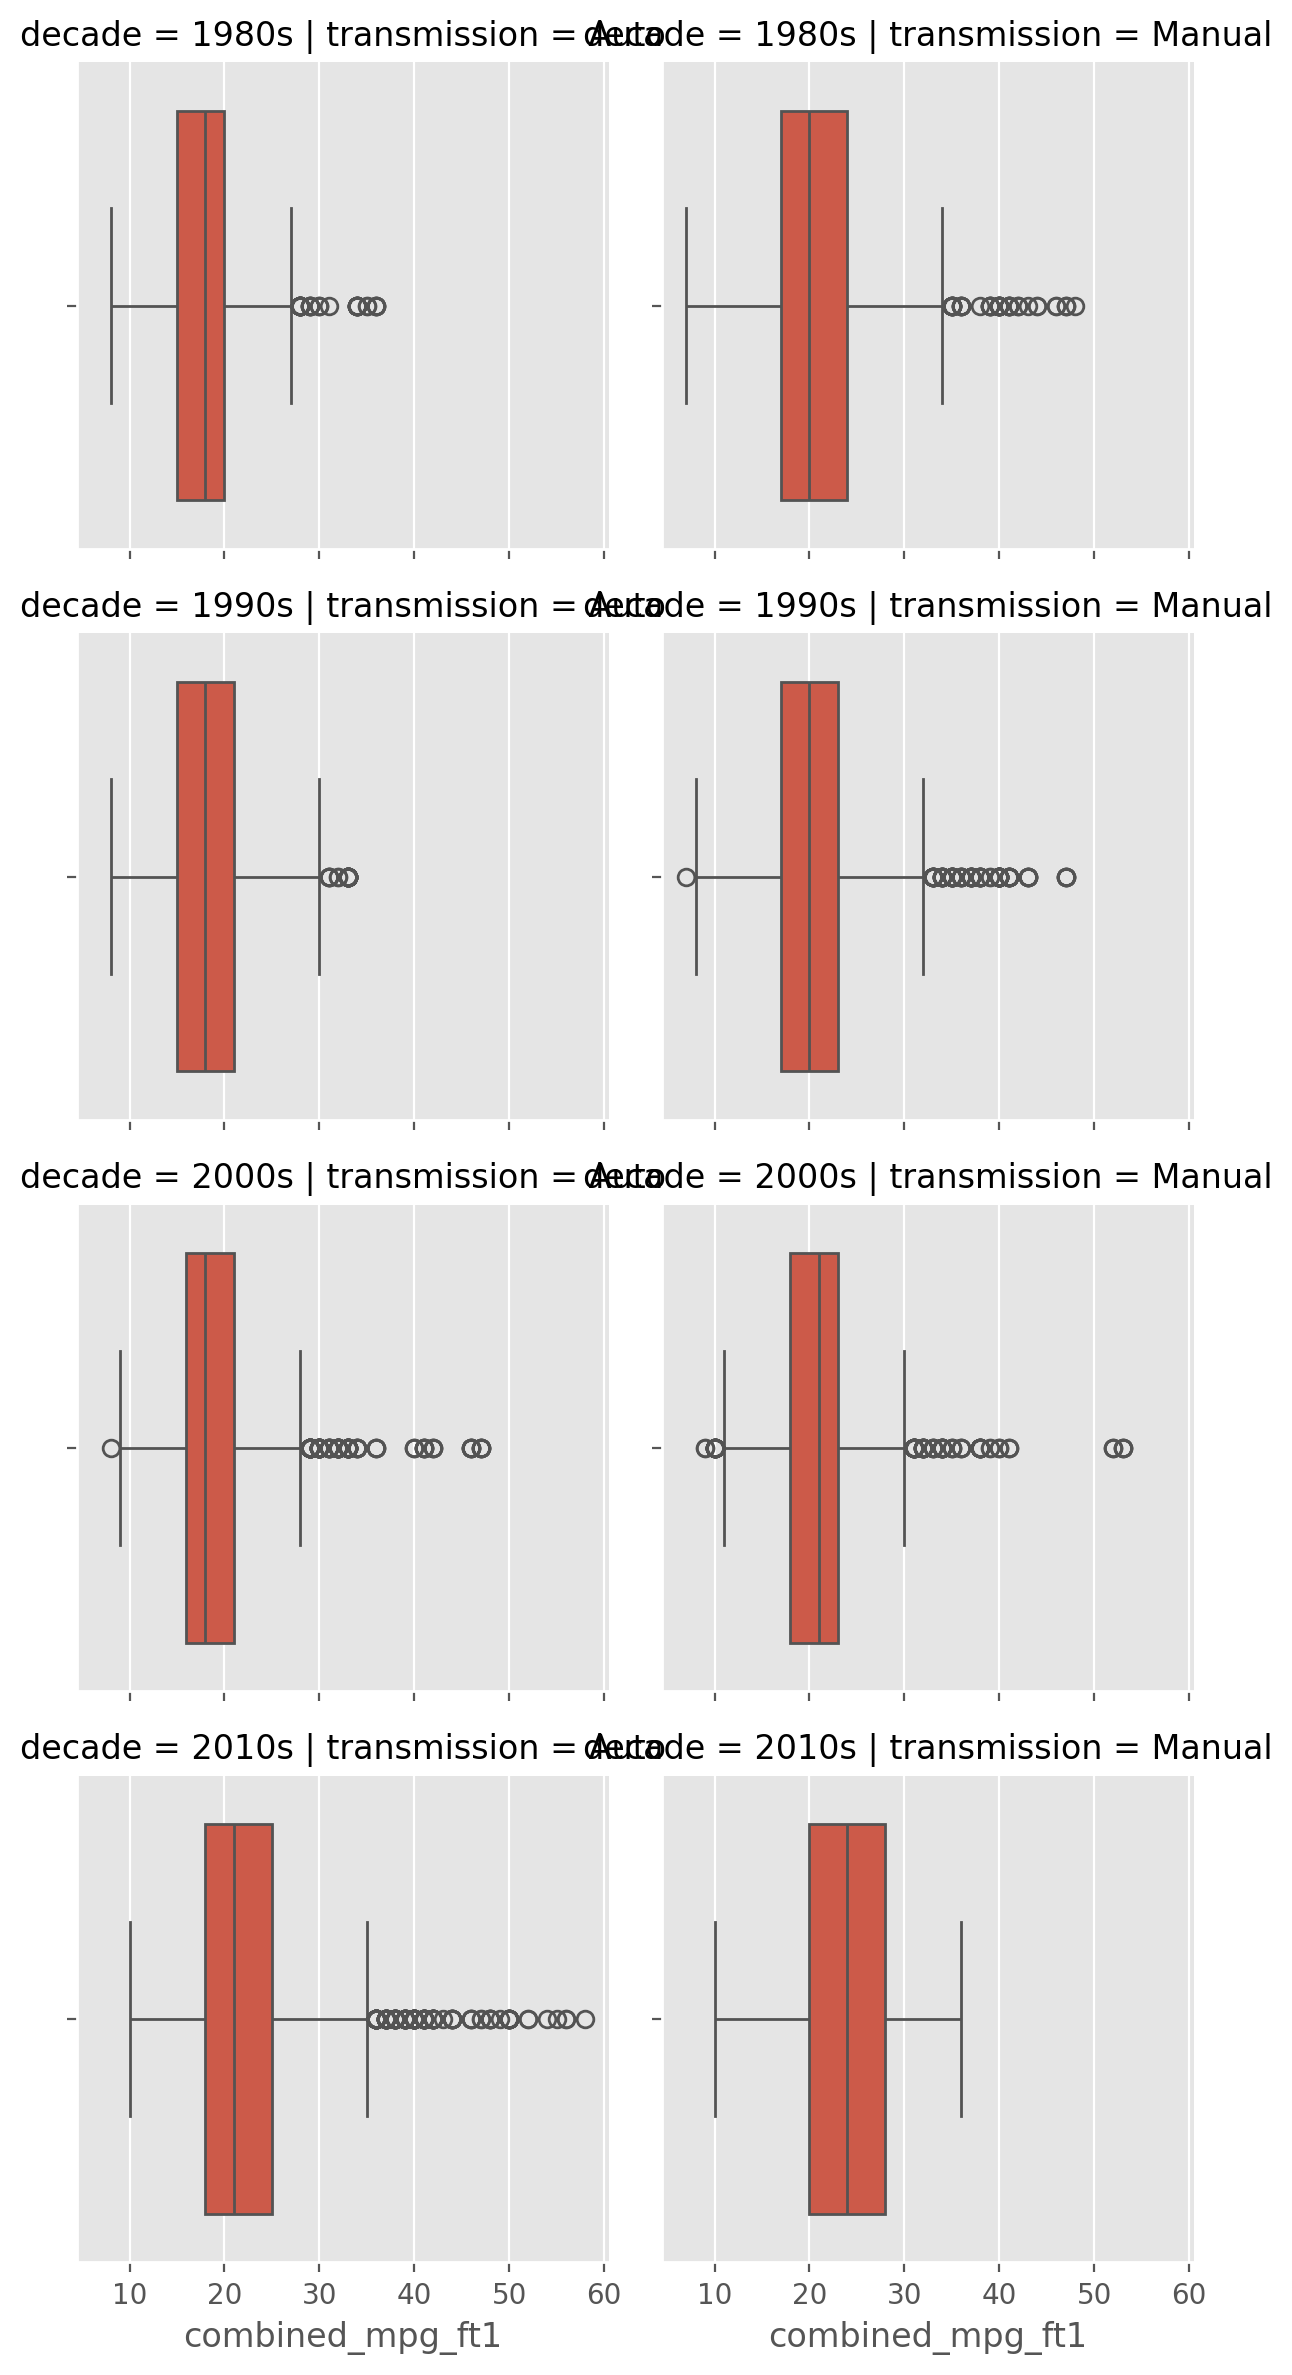

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

import seaborn as sns

g = sns.FacetGrid(data, col='transmission', row='decade')
g.map_dataframe(sns.boxplot, x='combined_mpg_ft1')

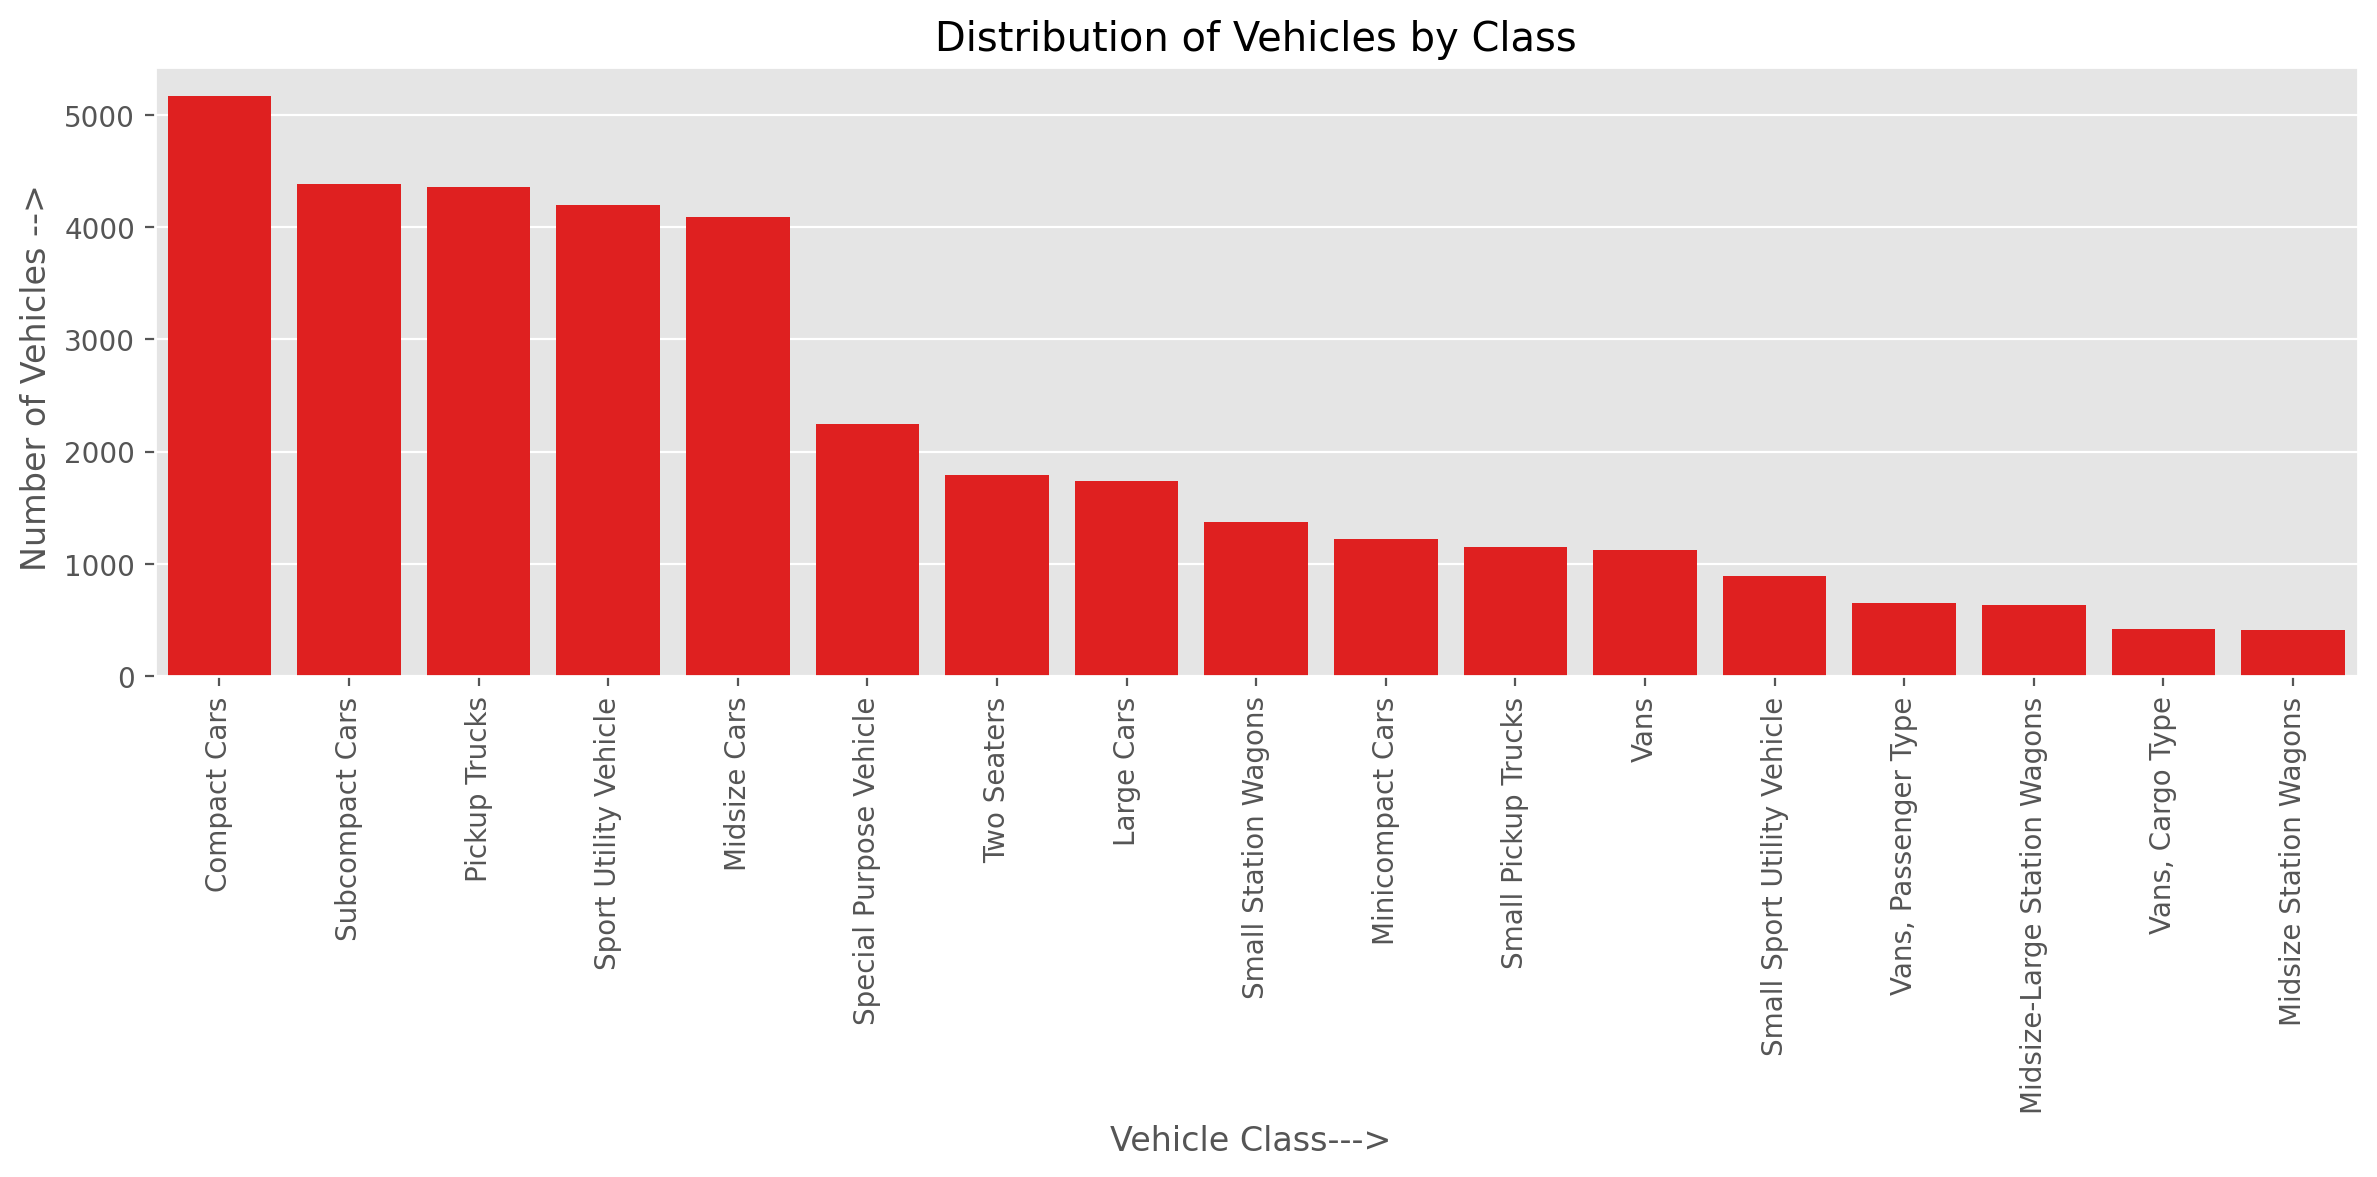

In [ ]:
plt.figure(figsize=(12, 6))
vehicle_classes = data['class'].value_counts()
sns.barplot(x=vehicle_classes.index, y=vehicle_classes.values, color='red')
plt.xticks(rotation=90)
plt.title('Distribution of Vehicles by Class')
plt.xlabel('Vehicle Class---> ')
plt.ylabel('Number of Vehicles --> ')
plt.tight_layout()
plt.show()

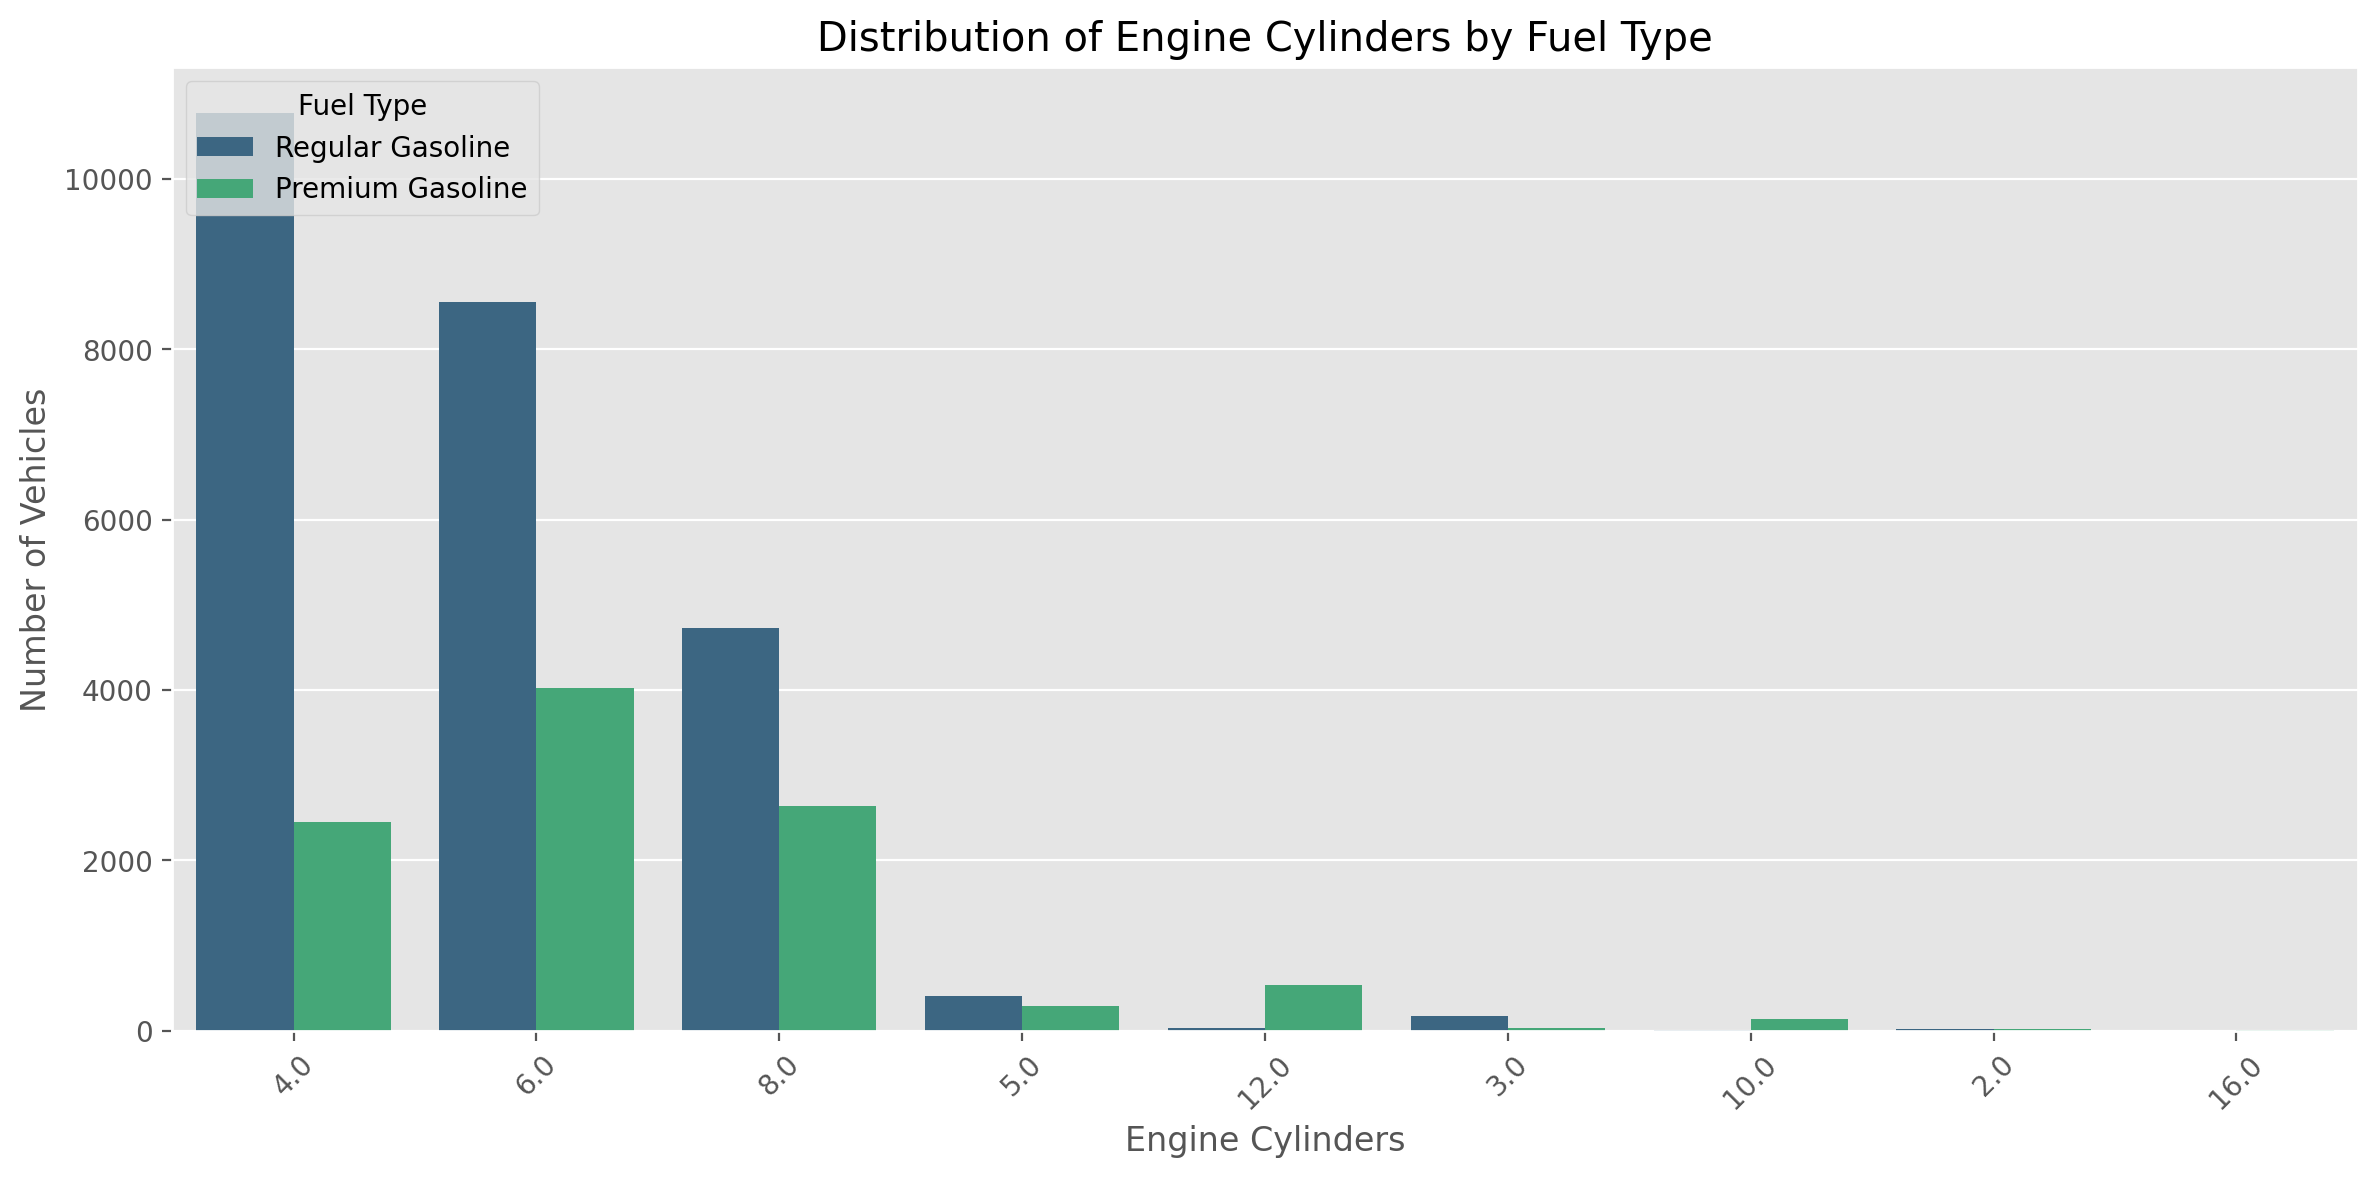

In [ ]:
# Filter data for only 'Regular Gasoline' and 'Premium Gasoline'
filtered_data = data[data['fuel_type_1'].isin(['Regular Gasoline', 'Premium Gasoline'])]

# Create countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='engine_cylinders', hue='fuel_type_1', data=filtered_data,
              order=filtered_data['engine_cylinders'].value_counts().index, palette='viridis')

# Customize plot
plt.xticks(rotation=45)
plt.title('Distribution of Engine Cylinders by Fuel Type')
plt.xlabel('Engine Cylinders')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.legend(title='Fuel Type', loc='upper left')
plt.show()

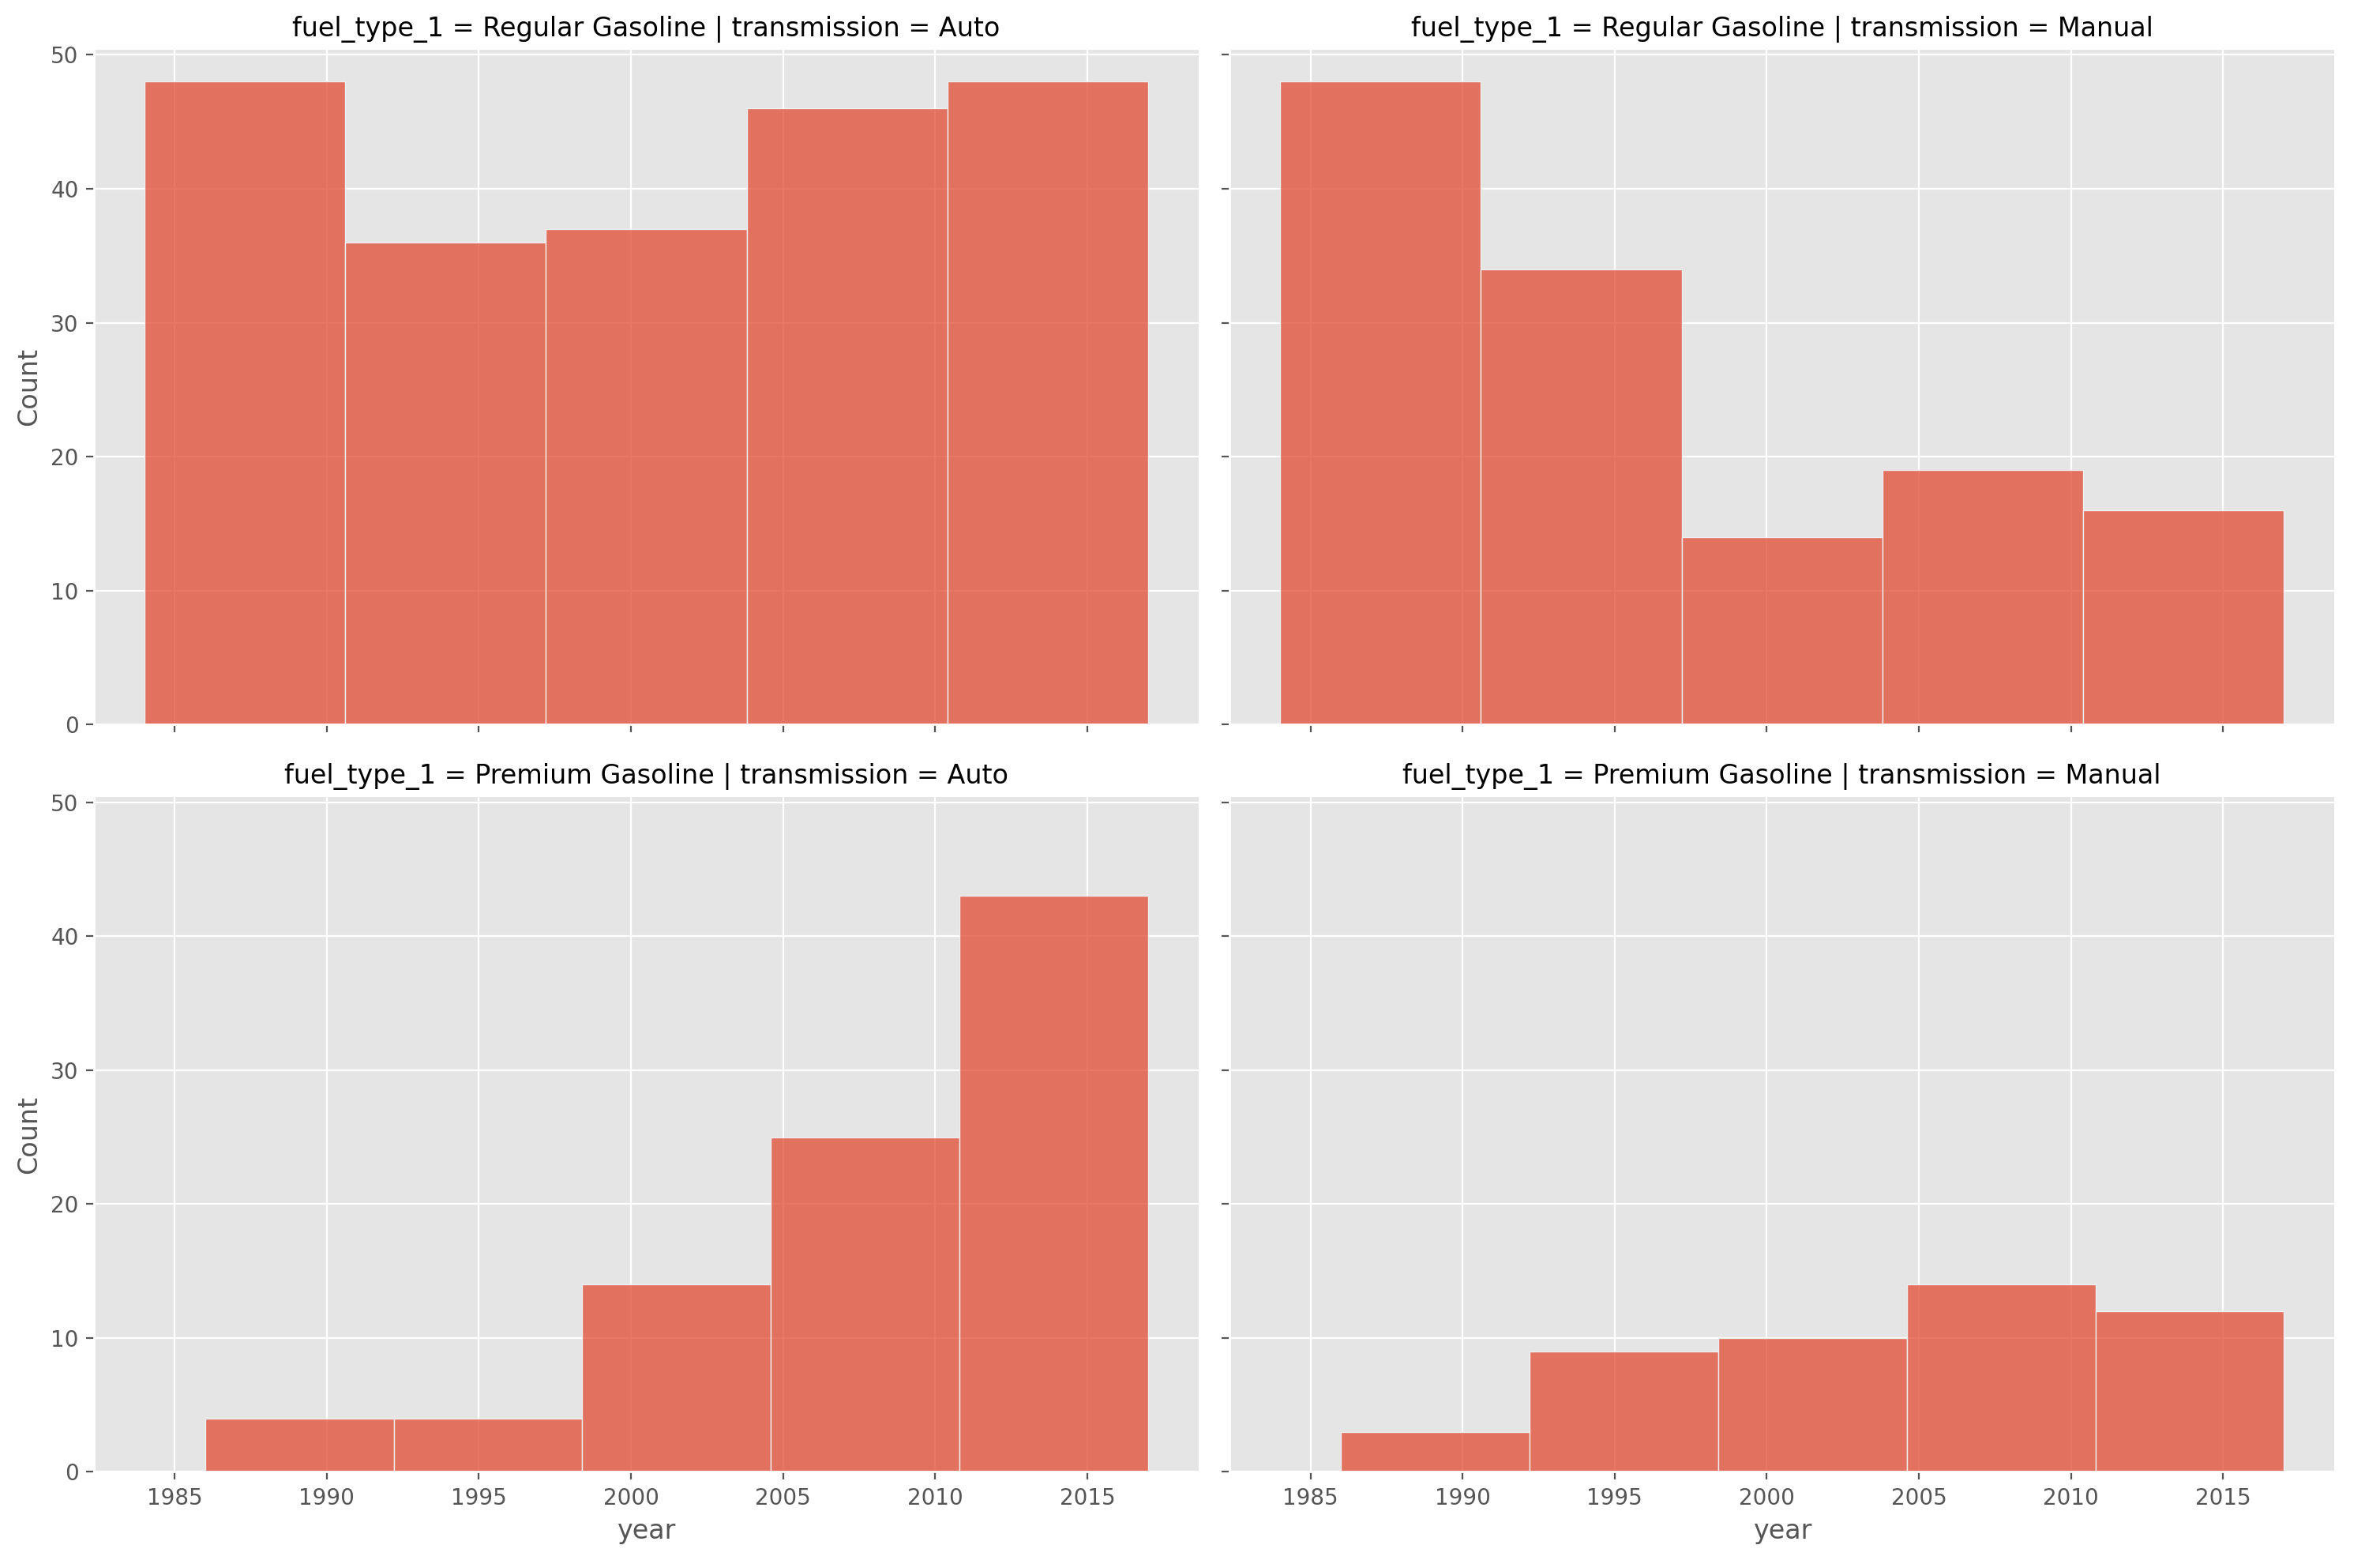

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset contains 'year', 'fuel_type_1', and 'transmission' columns

# Filter data for only 'Regular Gasoline' and 'Premium Gasoline'
rand_data= data.sample(n = 500)
d = rand_data[rand_data['fuel_type_1'].isin(['Regular Gasoline', 'Premium Gasoline'])]

# Create FacetGrid with hue
g = sns.FacetGrid(d, col='transmission', row='fuel_type_1', aspect=1.5, height=5)
g.map_dataframe(sns.histplot, x='year', bins=5)
g.add_legend()

plt.show()

## Summary & Conclusions <a id='sum'></a>

## References <a id='ref'></a>
#### Maharaj, S. (2024). *Vehicle Fuel Economy* [Data set]. Kaggle. https://www.kaggle.com/datasets/sahirmaharajj/fuel-economy